# Laboratory #01 : Image Operators and Filters

At the end of this laboratory, you would get familiarized with

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

**Remember this is a graded exercise.**

For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.

---


In [27]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)
import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology, color
from skimage.transform import resize
from skimage.color import rgb2gray

## Channels and color spaces

**Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

![black_and_white_patches.png](https://drive.google.com/uc?export=view&id=1Iuf870gS6DuFzMtnXs53DLuiXy0oARaw)

*   Visualize the created images in a 1 x 3 subplot using matplotlib.
*   Use the above three images to create the following image

![color_patches.png](https://drive.google.com/uc?export=view&id=1UxmFHToC4TUjgtB7UQMbB3DM3RIZlgBZ)

*Hint: Remember channels and color spaces*


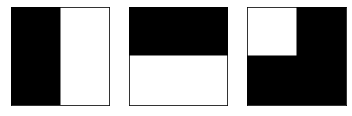

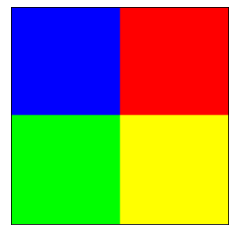

In [28]:
# creation of the three pictures bu creating an array of zeros and setting to one in the nedded positions
verticalBlack = np.zeros((100, 100))
verticalBlack[:, 50:] = 1

horizontalBlack = np.zeros((100, 100))
horizontalBlack[50:, :] = 1

whiteSquare = np.zeros((100, 100))
whiteSquare[:50, :50] = 1

# plot of the three b/w images
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(verticalBlack, cmap='gray')
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
ax2.imshow(horizontalBlack, cmap='gray')
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
ax3.imshow(whiteSquare, cmap='gray')
ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)
plt.show()

# for creating the 4 squares we must know that yellow = [255, 255, 0] so, to 
# create we need green in in the right side, red in the bottom and blue only on 
# the top left square so it is a matter of concatenating the tree images

rgbImage = np.stack((verticalBlack, horizontalBlack, whiteSquare), axis=2)
fig = plt.imshow(rgbImage)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()

**Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

![sillas.jpg](https://drive.google.com/uc?export=view&id=1Ged9FdDWIcipbNxNatGgCZyRdQvcGtoG)

*   Extract individual channels and plot them using matplotlib subplot.
*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where the everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.



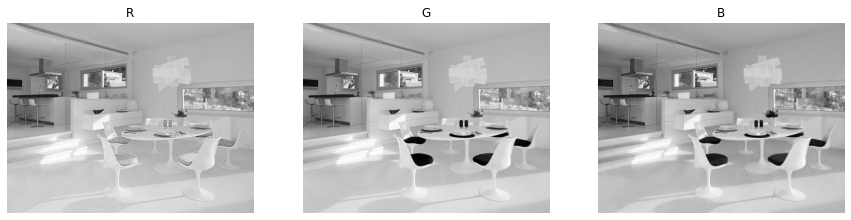

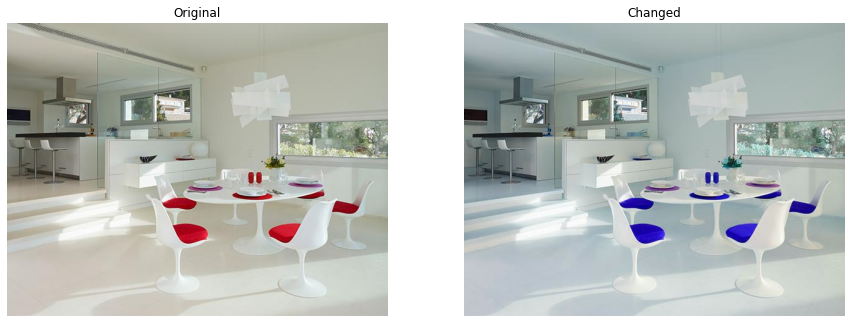

In [29]:
# read image
sillasImage = io.imread('images/sillas.jpg')

# plot all 3 channels as grayscale images
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,15))
ax1.imshow(sillasImage[:, :, 0], cmap='gray')
ax1.set_title('R')
ax1.axis('off')
ax2.imshow(sillasImage[:, :, 1], cmap='gray')
ax2.set_title('G')
ax2.axis('off')
ax3.imshow(sillasImage[:, :, 2], cmap='gray')
ax3.set_title('B')
ax3.axis('off')
plt.show()

# swap red and blue channels to make all red pixels appear blue
sillasChanged = np.copy(sillasImage)
sillasChanged[:,:,0] = sillasImage[:,:,2]
sillasChanged[:,:,2] = sillasImage[:,:,0]

# plot the two images side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(sillasImage)
ax1.set_title('Original')
ax1.axis('off')
ax2.imshow(sillasChanged)
ax2.set_title('Changed')
ax2.axis('off')
plt.show()

# Image Manipulation

**Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

![model_and_coat.png](https://drive.google.com/uc?export=view&id=1DOieJOrfwe34z0-3EEBVyX1Ac45sb5SN)


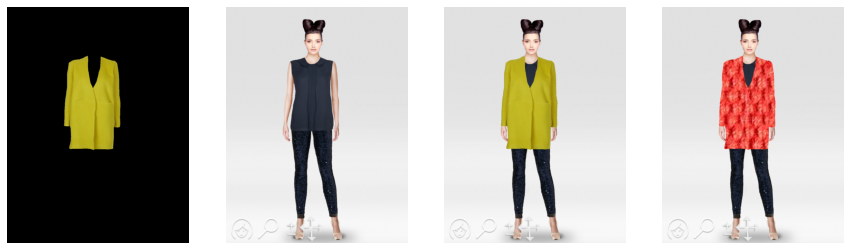

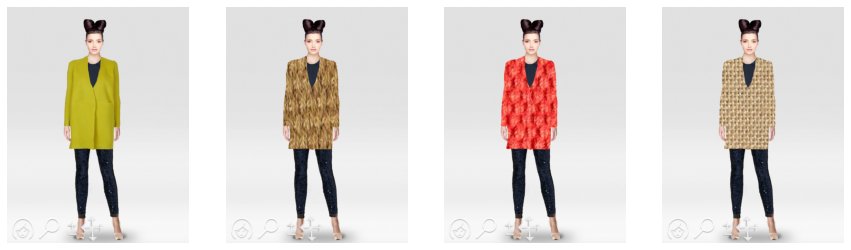

In [30]:
# solution
# load images
coat = io.imread("images/coat.png")
model = io.imread("images/model.png")

# convert to 3channel
coat = color.rgba2rgb(coat)
model = color.rgba2rgb(model)

# load textures
textures = [io.imread("images/texture.png"),
            io.imread("images/texture2.png"),
            io.imread("images/texture3.jpg")]

# resize texture to fit model picture
textures = list(map(lambda texture: resize(texture, model.shape), textures))

# create mask in the green channel
coatMask = np.nonzero(coat[:,:,1])

modelImageCopy = model.copy()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15,15))
ax1.imshow(coat)
ax1.axis('off')
ax2.imshow(modelImageCopy)
ax2.axis('off')
modelImageCopy[coatMask] = coat[coatMask]
ax3.imshow(modelImageCopy)
ax3.axis('off')
modelImageCopy[coatMask] = textures[1][coatMask]
ax4.imshow(modelImageCopy)
ax4.axis('off')
plt.show()

# replace and plot the indexes in the mask by the texture info
f, ax = plt.subplots(1, 4, figsize=(15, 5))
for idx, texture in enumerate([coat] + textures):
  modelImageCopy[coatMask] = texture[coatMask]
  ax[idx].imshow(modelImageCopy)
  ax[idx].axis('off')
f.show()

# Contrast Enhancement

**Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.
*   Vary the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.



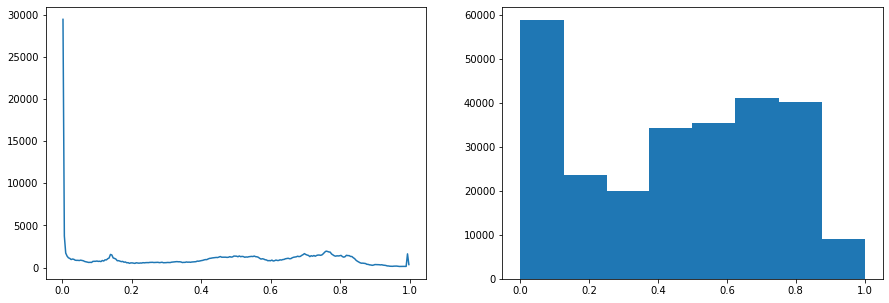

In [31]:
# solution
# load data
astronautRgb = data.astronaut()

# rgb to gray
astronautGray = color.rgb2gray(astronautRgb)

# histogram computation, as default and with 8 bins
hist, binCenters = exposure.histogram(astronautGray)
histQuantized, binCentersQuantized = exposure.histogram(astronautGray, nbins=8)

# plot
f, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(binCenters, hist)
ax[1].bar(binCentersQuantized, histQuantized, width=0.13)
plt.show()



*   What happens when you change your bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

- When we change the bin count, the x-axis reduces the number of bins, increasing the number of pixels per bin in the y-axis as well. When you reduce the bin count you are efectively calculating the histogram of a quantized image. The samples that are in between the quantized bins are computed as if they were in the nearest bin color. When the bin count is low it does not represent the actual image but an approximation of the histogram. The correct bin should correspond to the number of possible values each pixel can take in this case 2**8.

- When the bin count is very low, inference becomes much more complicated as many pixels are aggregated into the same bin, while, for high bin count, many of the bins would be empty or underrepresented and therefore adding little to no information to the histogram representation.


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in the same plot).


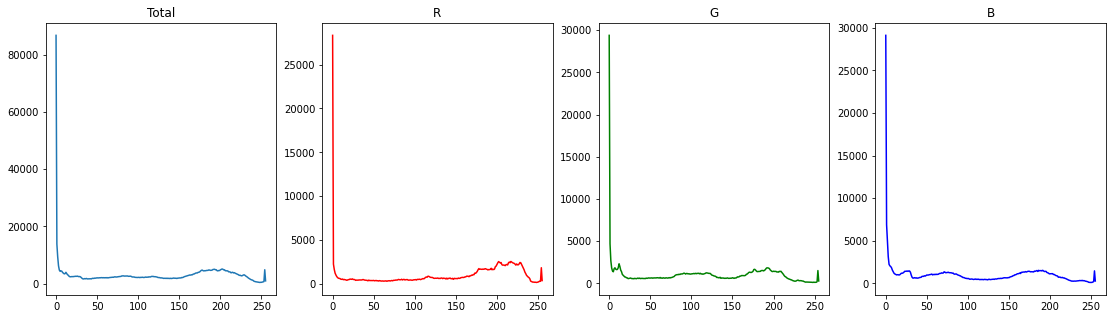

In [32]:
#solution
hist, centerBins = exposure.histogram(astronautRgb)
f, ax = plt.subplots(1, 4, figsize=(19, 5))
ax[0].set_title('Total')
ax[0].plot(centerBins, hist)
for idx, (colorString, colorImage) in enumerate(zip("rgb", astronautRgb.swapaxes(0, 2))):
  hist, centerBins = exposure.histogram(colorImage)
  ax[idx + 1].set_title(colorString.upper())
  ax[idx + 1].plot(centerBins, hist, color=colorString)
f.show()

**Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



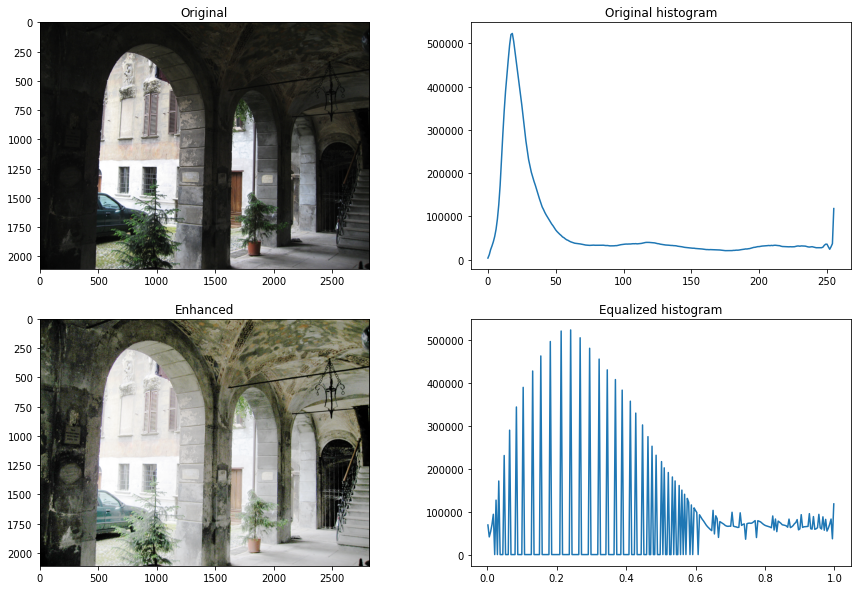

In [33]:
aquatermiLowcontrastImage = io.imread('images/aquatermi_lowcontrast.jpg')
hist, binCenters = exposure.histogram(aquatermiLowcontrastImage)
aquatermiEqualizedImage = exposure.equalize_hist(aquatermiLowcontrastImage)
histEqualized, binCentersEqualized = exposure.histogram(aquatermiEqualizedImage)

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].imshow(aquatermiLowcontrastImage)
axs[0, 0].set_title('Original')
axs[1, 0].imshow(aquatermiEqualizedImage)
axs[1, 0].set_title('Enhanced')
axs[0, 1].plot(binCenters, hist)
axs[0, 1].set_title('Original histogram')
axs[1, 1].plot(binCentersEqualized, histEqualized)
axs[1, 1].set_title('Equalized histogram')
plt.show()


*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

On the one hand, Linear Contrast Stretch only applies a linear scaling function to the image pixel values changing the range of the pixel values in the image. On the other hand, histogram equalization employs non-linear mapping which re-assigns the intensity values of pixels in the input image trying to resemble a uniform distribution of values.

**Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



(0, 237) -> (0, 255)


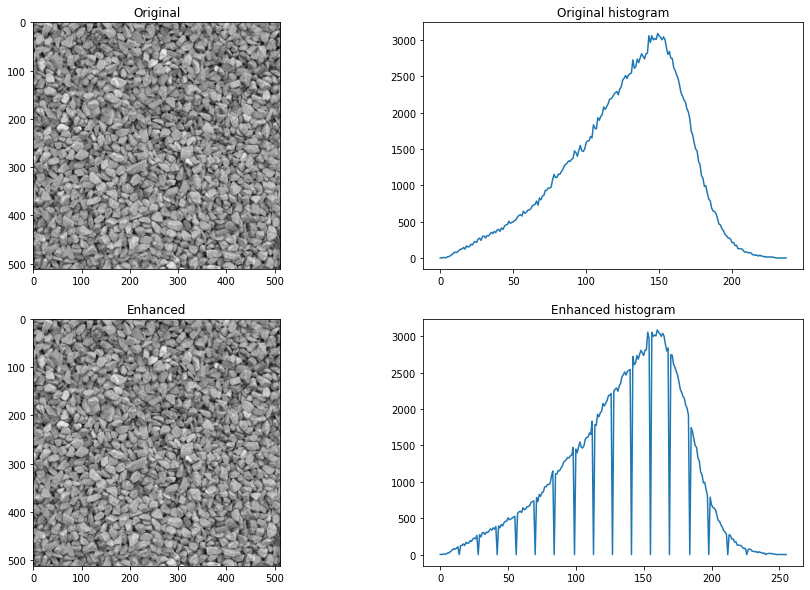

In [34]:
def linearContrastStretch(image, binCount=None):
  """
  performs a linear scaling operation by, normalizing the minimum value to 0
  scaling the range by (maxOut - minOut) / (maxIn - minIn) and then adding
  minOut value to restore the desired range.
  """
  # variable definitions
  minIn = image.min()
  maxIn = image.max()
  minOut = 0
  if binCount is None and (image.dtype.kind in ("u", "i")):
    maxOut = 2**(8*image.dtype.alignment) - 1
  elif binCount is not None:
    maxOut = int(binCount)
  else:
    raise ValueError("image datatype should be int or binCount must be specified")
    
  rangeRatio = float(maxOut - minOut) / float(maxIn - minIn)

  # print for info
  print(f"({minIn}, {maxIn}) -> ({minOut}, {maxOut})")

  # compute and return operation
  return (((image - minIn) * rangeRatio) + minOut).astype(image.dtype)

gravelImage = data.gravel()
enhancedImage = linearContrastStretch(gravelImage)

hist, centerBins = exposure.histogram(gravelImage)
enhancedHist, enhancedCenterBins = exposure.histogram(enhancedImage)

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].imshow(gravelImage, cmap='gray')
axs[0, 0].set_title('Original')
axs[1, 0].imshow(enhancedImage, cmap='gray')
axs[1, 0].set_title('Enhanced')
axs[0, 1].plot(centerBins, hist)
axs[0, 1].set_title('Original histogram')
axs[1, 1].plot(enhancedCenterBins, enhancedHist)
axs[1, 1].set_title('Enhanced histogram')
plt.show()

# Filters

**Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.
*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter.
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.



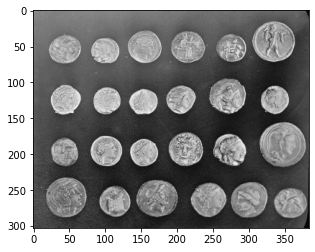

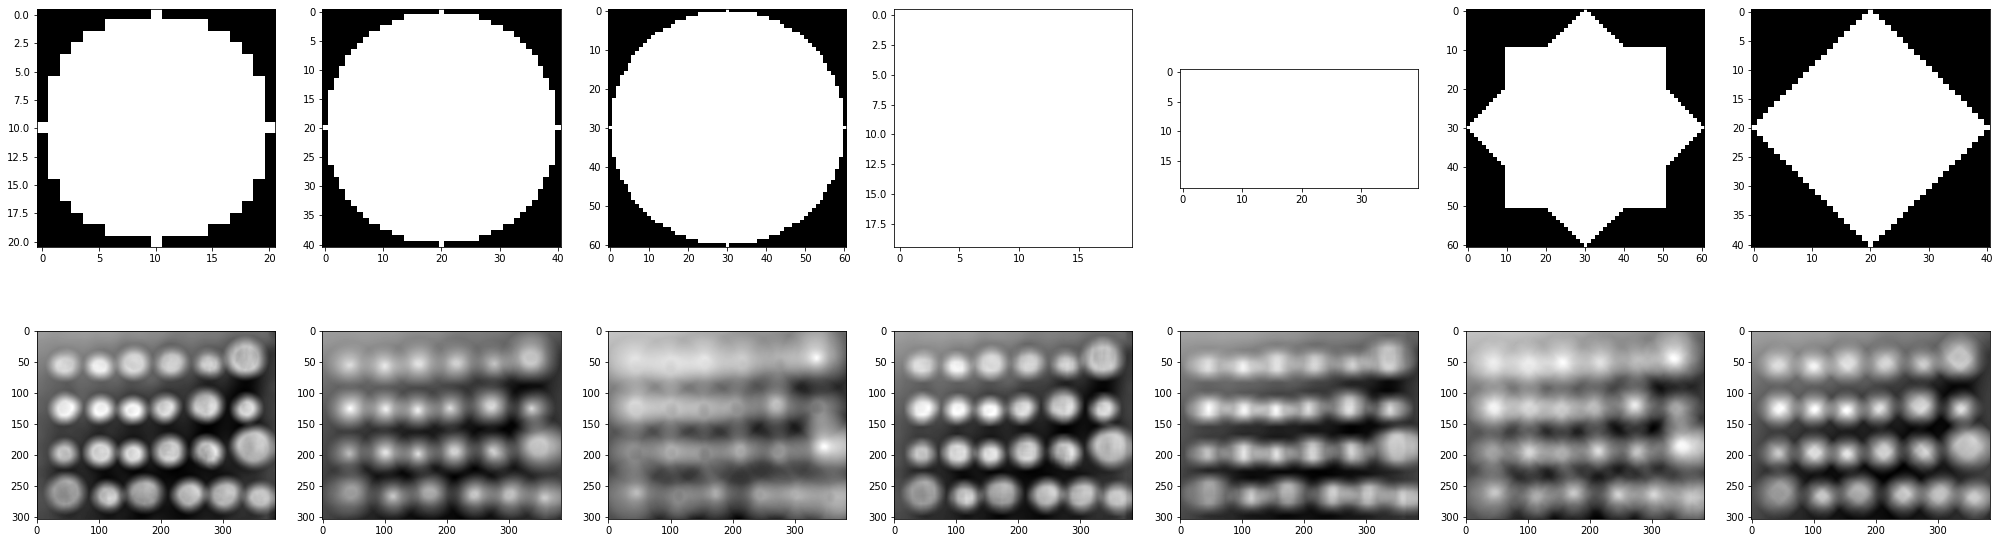

In [35]:
# solution

# load data
coinsImage = data.coins()

plt.imshow(coinsImage, cmap='gray')
#define selem objects
selemObjects = [
    morphology.selem.disk(10),
    morphology.selem.disk(20),
    morphology.selem.disk(30),
    morphology.selem.square(20),
    morphology.selem.rectangle(20, 40),
    morphology.selem.star(20),
    morphology.selem.diamond(20)
]

# compute mean with each object
meanImages = [filters.rank.mean(coinsImage, selemObject) for selemObject in selemObjects]

# plot each pair
f, ax = plt.subplots(2, len(selemObjects), figsize=(35, 10))
for idx, (selemImage, meanImage) in enumerate(zip(selemObjects, meanImages)):
    ax[0][idx].imshow(selemImage, cmap='gray', vmin=0, vmax=1)
    ax[1][idx].imshow(meanImage, cmap='gray')
plt.show()



*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

As the radius gets bigger, the area that is being averaged increases and the image becomes blurrier.


*   What is the observed behaviour with difference in the structuring element?



**Solution**

As the coins are circular, when the mean operation is performed with a circular kernel, the shape is preserved way better and depending on the filter it becomes more apparent that the mismatch between the shapes in the image and the shape of the filters causes leakage between the coins, making the image less defined.



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

- While all the values within the filter have the same weight, a gaussian filter weights its values by an approximation of a gaussian distribution, increasing the influence of the nearest neighboring pixels. 

- A Gaussian filter may be more effective to reduce the noise, while mean filters keep the edges and the contrastness of the image better. When the desired result is lose as little as possible of the shape of the objects, a regular averager with a defined contour should be used.


---

## **End of P1: Image operators and filters**
